# Exploratory data analysis : analyse exploratoire de données
Données à analyser:  "Diagnosis of covid-19 and its clinical spectrum".
Disponible sur Kaggle : https://www.kaggle.com/datasets/einsteindata4u/covid19. 
Il s'agit de résultats cliniques de plus de 5000 personnes sur la pandémie  Covid_19.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
Data = pd.read_excel("dataset.xlsx") 

# Demarche:

#### Définir un objectif mesurable( éviter de partir dans tous les sens).
Ici on va essayer de comprendre au mieux nos données à travers une étude des variables et des relations netre ces variables. Il s'agit de la phase exploratoire indispensable à tout projet de modélisation en IA.

#### Checklist de base 
> Analyse de forme 
* Identification de la target
* Nombdre de lignes et de colonnes
* Type de variables ( discrète/continue)
* Identification des valeurs manquantes etc.
> Analyse de fond
* Visualisation de la target(Histogramme/Boxplot)
* Visualisation des relations features_target (Histogramme/Boxplot) etc. 

# 1. Analyse de forme

### Target variable : "SARS-Cov-2 exam result". 
Par principe le target variable (variable cible), c'est la variable qui contient des résulats déterminant pour l'analyse. Ici on vise une prédiction 
en termes de contamination. d'où le choix de "SARS-Cov-2 exam result". 

In [3]:
Data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

In [7]:
# On fait une copie de notre dataset
Data2= Data.copy()

In [8]:
# Nombre de lignes et de colonnes : la taille de notre dataset
Data2.shape 

(5644, 111)

In [5]:
pd.set_option('display.max_rows', 111) # Afiicher toutes les colonnes
pd.set_option('display.max_columns', 111) # Afficher toutes les lignes

In [9]:
# Comptabiliser par type les variables
Data2.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

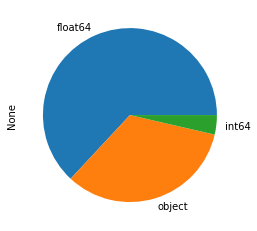

In [10]:
# Un diagramme pour visualiser la répartition des types par catégories
Data2.dtypes.value_counts().plot.pie()
plt.show()

In [11]:
# Valeurs manquantes avec un tableau boolean. 
Data2.isna() 

Patient ID  Patient age quantile  SARS-Cov-2 exam result  \
0          False                 False                   False   
1          False                 False                   False   
2          False                 False                   False   
3          False                 False                   False   
4          False                 False                   False   
...          ...                   ...                     ...   
5639       False                 False                   False   
5640       False                 False                   False   
5641       False                 False                   False   
5642       False                 False                   False   
5643       False                 False                   False   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   
...                                              ...   
5639                                           False   
5640                                           False   
5641                                           False   
5642                                           False   
5643                                           False   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                 False       
1                                                 False       
2                                                 False       
3                                                 False       
4                                                 False       
...                                                 ...       
5639                                              False       
5640                                              False       
5641                                              False       
5642                                              False       
5643                                              False       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                 False            True   
1                                                 False           False   
2                                                 False            True   
3                                                 False            True   
4                                                 False            True   
...                                                 ...             ...   
5639                                              False            True   
5640                                              False            True   
5641                                              False            True   
5642                                              False            True   
5643                                              False           False   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0           True       True                   True             True   
1          False      False                  False            False   
2           True       True                   True             True   
3           True       True                   True             True   
4           True       True                   True             True   
...          ...        ...                    ...              ...   
5639        True       True                   True             True   
5640        True       True                   True             True   
5641        True       True                   True             True   
5642        True       True                   True             True   
5643       False      False                  False            False   

      Lymphocytes  Mean corpu

> Affichage en image toute la dataset dans un tableau thermique avec la fonction heatmap() de seaborn.
En noir là où on a des valeurs et le vide les valeurs manquantes. 
On constate beaucoup de blanc qui montre le nombre élevé de valeurs manquantes.

<AxesSubplot:>

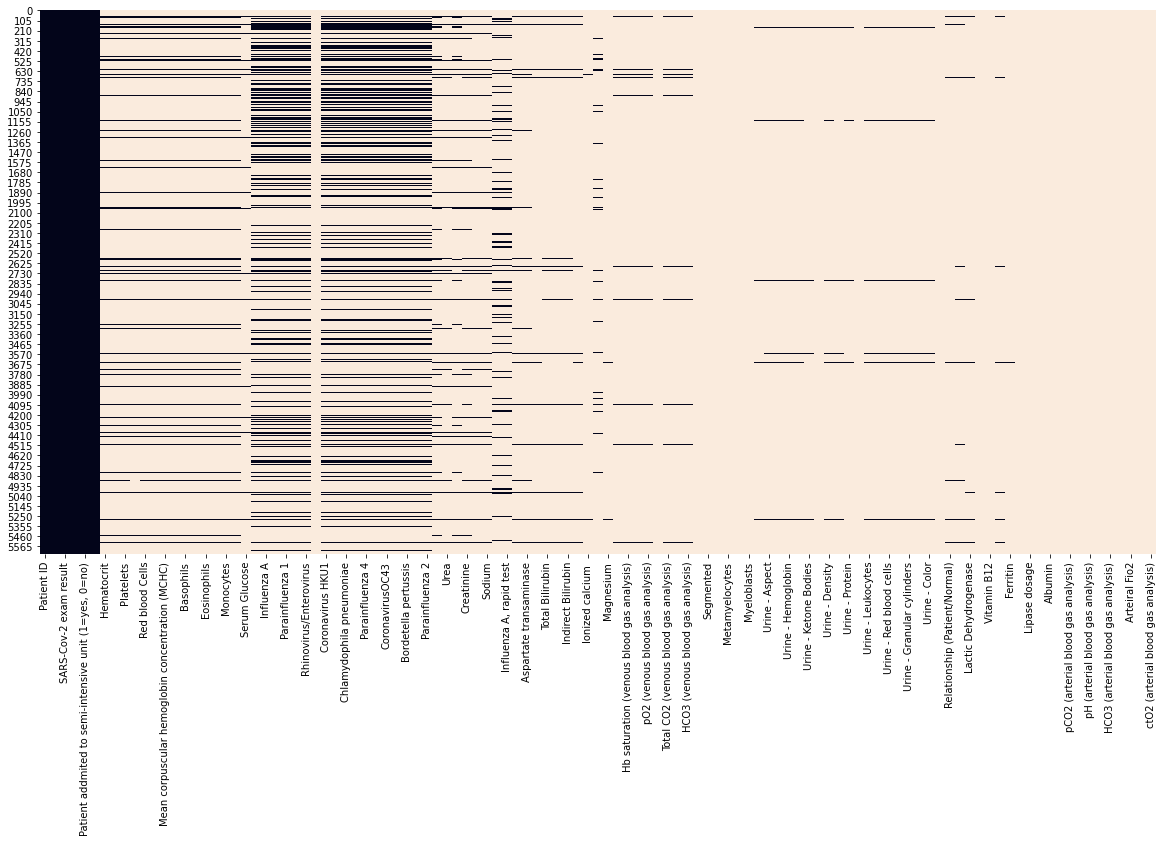

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(Data2.isna(), cbar=False)

In [13]:
Data2.isna().sum() # somme des valeurs manquantes
Data2.isna().sum()/Data2.shape[0] #la somme/le nombre de lignes pour obtenir le % valeurs manquantes
#Trier par ordre, ici par ordre croissant
#(Data2.isna().sum()/Data2.shape[0]).sort_values(ascending=True)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpu

* Une catégorie qui possède 76% de valeurs manquantes
* Une autre 89% 
* Un dernier plus de 90% de valeurs manquantes
* On voit donc que beaucoup de vriables méritent d'etre éliminées par manque de valeurs suffisantes.


# 2. Analyse de fond

#### 2.1. Nettoyage de notre dataset 

#### Demarche : 

* La moyenne de la somme de de toutes les valeurs manquantes:
> Data2.isna().sum()/Data2.shape[0]
* Ensuite on fait un filtre en éliminant les valeurs supérieures à 90% ou en conservant les 
 inférieures à 90% ( c'est tout pareil!) :
 > Data2.isna().sum()/Data2.shape[0]<0.90
* On applique ensuite à toutes les colonnes de la dataset
> Data2.columns[Data2.isna().sum()/Data2.shape[0]<0.90]
* Pour finir on réintègre dans la dataset en créant ainsi une nouvelle base qui contient toutes 
 ces valeurs :
> Data3 = Data2[Data2.columns[Data2.isna().sum()/Data2.shape[0]<0.90]]

In [14]:
Data3 = Data2[Data2.columns[Data2.isna().sum()/Data2.shape[0]<0.90]]
Data3 # On passe de 111 colonnes à 39 colonnes

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                    13               negative   
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
...               ...                   ...                    ...   
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0            NaN        NaN                    NaN              NaN   
1      -0.022340  -0.517413               0.010677         0.102004   
2            NaN        NaN                    NaN              NaN   
3            NaN        NaN                    NaN              NaN   
4            NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5639         NaN        NaN                    NaN              NaN   
5640         NaN        NaN                    NaN              NaN   
5641         NaN        NaN                    NaN              NaN   
5642         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903        

<AxesSubplot:>

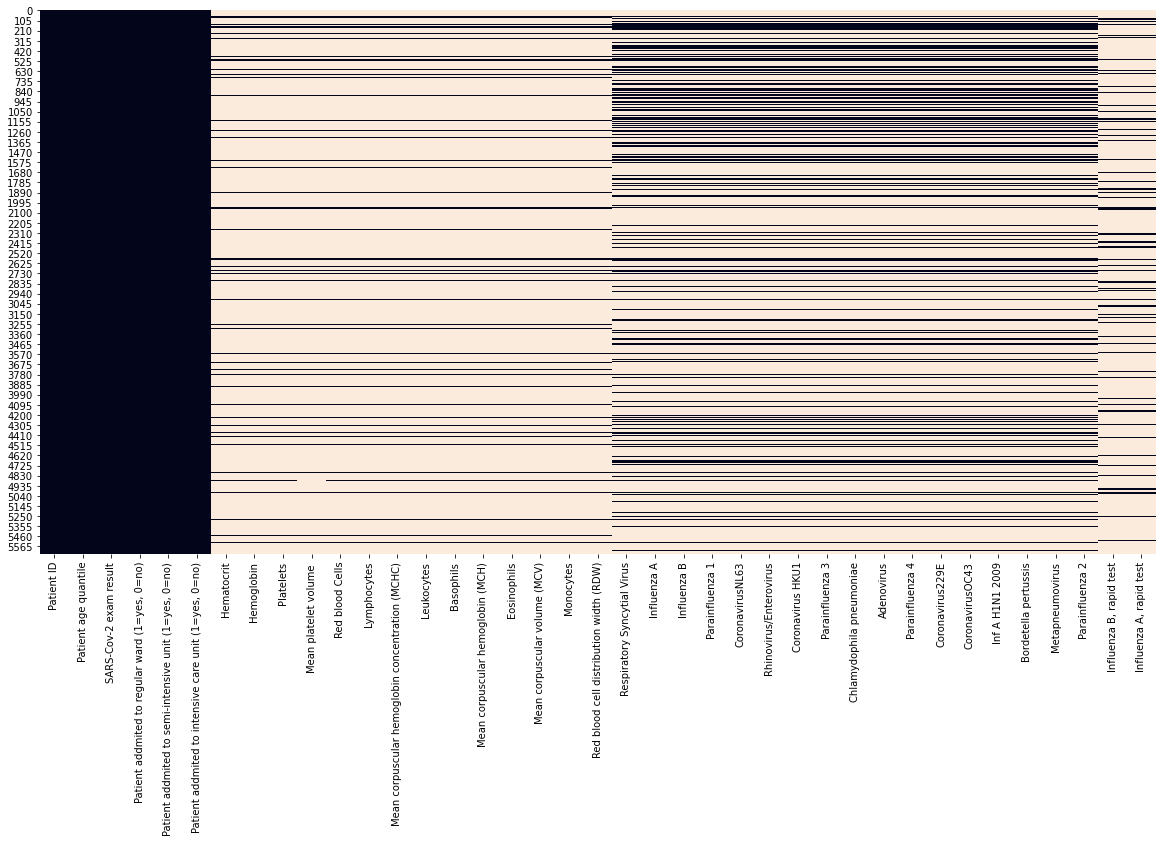

In [15]:
# On vérifie à quoi ressemble notre nouveau tableau (nettoyé des valeurs manquantes et plus propres)
plt.figure(figsize=(20,10))
sns.heatmap(Data3.isna(), cbar=False)

In [16]:
# Tiens! une autre colonne sans grande importance forcement:"Patient ID"
# On la supprime donc. 
Data3 = Data3.drop("Patient ID", axis=1)

2.2. Examen de la colonne target pour déterminer le nombre de cas positifs et le nombre de cas négatifs.
> NB: Les cas ne sont pas équilibrés (5086 pour cas negatifs et 558 pour cas positifs) donc il faut choisir la métrique en conséquence pour éviter une fausse
> prédiction. 10% cas positifs, le reste cas négatifs.


In [17]:
# Notre target est une variable à deux valeurs valeurs possibles: cas négatifs et positifs
# On va donc tenter de dénombrer le nombre total de chaque réponse

Data3["SARS-Cov-2 exam result"].value_counts() 
#Data3["SARS-Cov-2 exam result"].value_counts(normalize=True)# Afficher en pourcentage

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

#### 2.3. Comprendre la signification des différentes variables à travers l'histogramme des valeurs continues 

> Demarche:
Affichage par types à  travers un boucle for.

> Remarque:
A partir de la distribution de chaque variable, on constate que les données sont standardisées car les courbes sont centrées autour de zéro avec un écart type proche de 1. Une distribution normale dans l'ensemble 
avec seulement deux cas asymétriques. 

In [18]:
Data3.dtypes.value_counts() # Rappel des types

object     20
float64    14
int64       4
dtype: int64

C:\Users\ADOU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADOU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADOU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

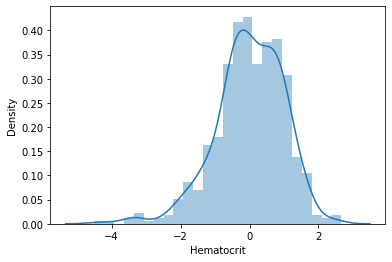

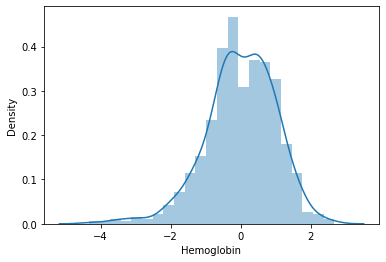

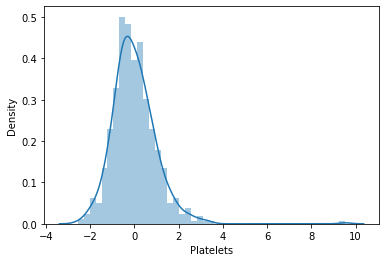

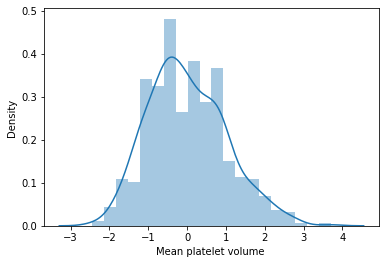

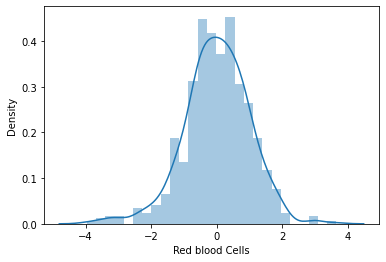

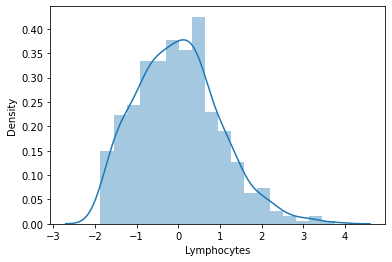

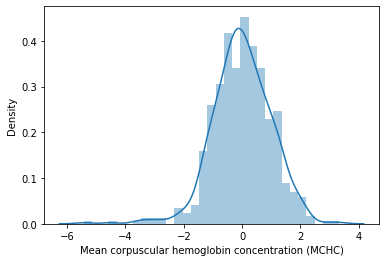

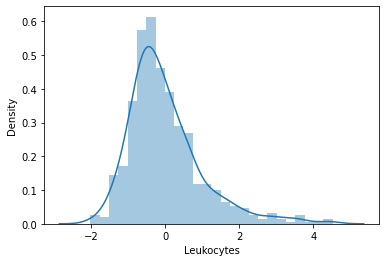

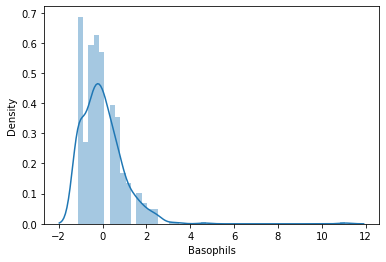

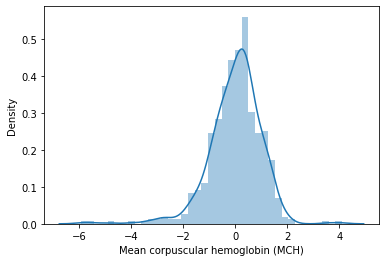

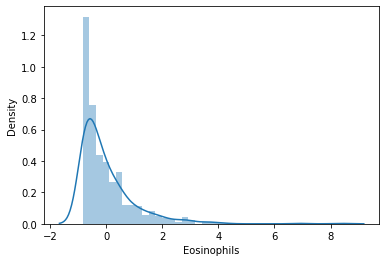

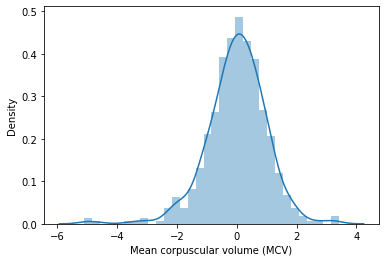

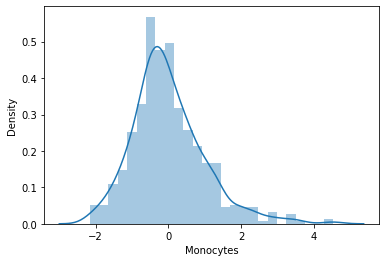

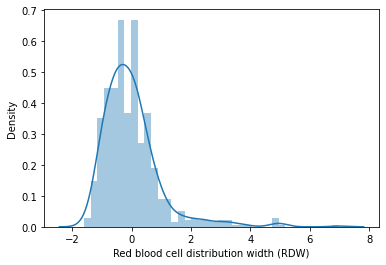

In [19]:
# On choisit ici les vraiables de types float64 ou float simplement

for col in Data3.select_dtypes("float64"):
    plt.figure()
    sns.distplot(Data3[col])

#### 2.4.  Visualisation des variables catégorielles de type object: catégorie positive et négative

> Demarche:
1.  Voir les différentes catégories qu'il y a dans chaque variable. On va le faire en utilisant la fonction np.unique() de numpy; disponible également dans pandas.
> 
2. Avec value_counts() afficher un graphique (camembert) pour analyser la répartition des catégories par variable. A ce niveau, on remarque que la majorité des tests viraux sont négatifs, à part le Rhinovirus qui semble très élévé.

NB: On va utiliser quelque astuce f-strings pour mieux afficher à la fin! Un système de marge en gros!

In [20]:
for col in Data3.select_dtypes("object"):
    print(col, Data3[col].unique())
    
# On peut accessoirement;Data3["Respiratory Syncytial Virus"].unique() ou
#Data3["Respiratory Syncytial Virus"].value_counts() 

SARS-Cov-2 exam result ['negative' 'positive']
Respiratory Syncytial Virus [nan 'not_detected' 'detected']
Influenza A [nan 'not_detected' 'detected']
Influenza B [nan 'not_detected' 'detected']
Parainfluenza 1 [nan 'not_detected' 'detected']
CoronavirusNL63 [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus [nan 'detected' 'not_detected']
Coronavirus HKU1 [nan 'not_detected' 'detected']
Parainfluenza 3 [nan 'not_detected' 'detected']
Chlamydophila pneumoniae [nan 'not_detected' 'detected']
Adenovirus [nan 'not_detected' 'detected']
Parainfluenza 4 [nan 'not_detected' 'detected']
Coronavirus229E [nan 'not_detected' 'detected']
CoronavirusOC43 [nan 'not_detected' 'detected']
Inf A H1N1 2009 [nan 'not_detected' 'detected']
Bordetella pertussis [nan 'not_detected' 'detected']
Metapneumovirus [nan 'not_detected' 'detected']
Parainfluenza 2 [nan 'not_detected']
Influenza B, rapid test [nan 'negative' 'positive']
Influenza A, rapid test [nan 'negative' 'positive']


In [67]:
# Meme code avec f-strings pour afficher des marge.

for col in Data3.select_dtypes("object"):
    print(f"{col:-<50}{Data3[col].unique()}")

SARS-Cov-2 exam result----------------------------['negative' 'positive']
Respiratory Syncytial Virus-----------------------[nan 'not_detected' 'detected']
Influenza A---------------------------------------[nan 'not_detected' 'detected']
Influenza B---------------------------------------[nan 'not_detected' 'detected']
Parainfluenza 1-----------------------------------[nan 'not_detected' 'detected']
CoronavirusNL63-----------------------------------[nan 'not_detected' 'detected']
Rhinovirus/Enterovirus----------------------------[nan 'detected' 'not_detected']
Coronavirus HKU1----------------------------------[nan 'not_detected' 'detected']
Parainfluenza 3-----------------------------------[nan 'not_detected' 'detected']
Chlamydophila pneumoniae--------------------------[nan 'not_detected' 'detected']
Adenovirus----------------------------------------[nan 'not_detected' 'detected']
Parainfluenza 4-----------------------------------[nan 'not_detected' 'detected']
Coronavirus229E---------

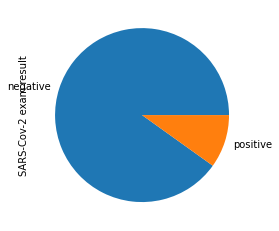

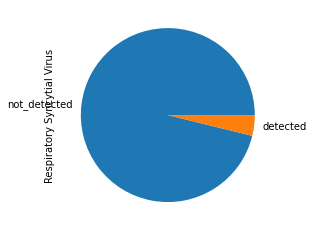

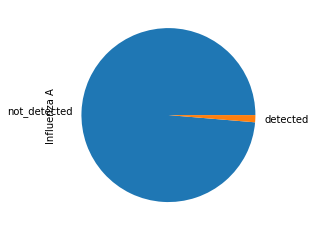

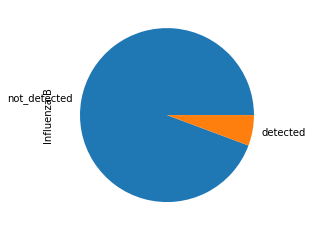

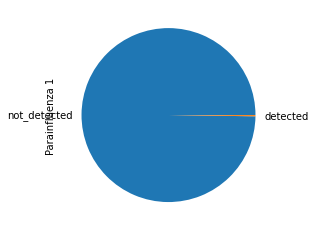

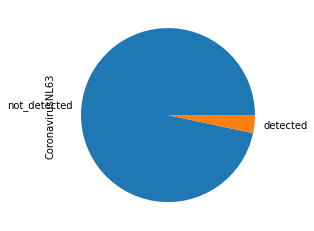

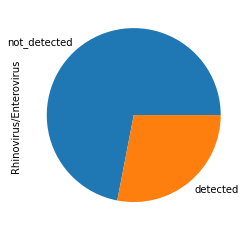

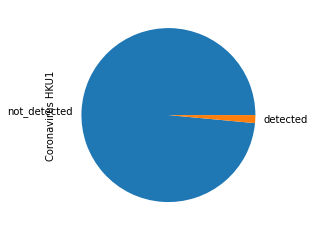

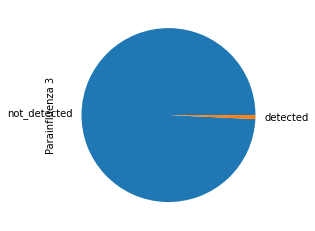

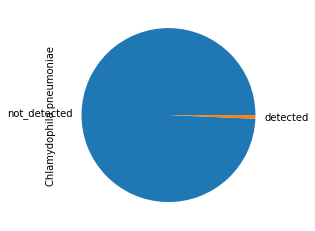

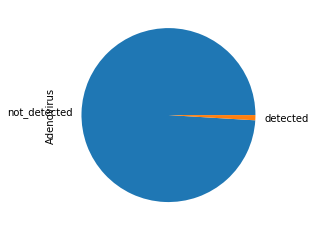

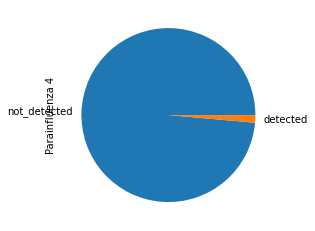

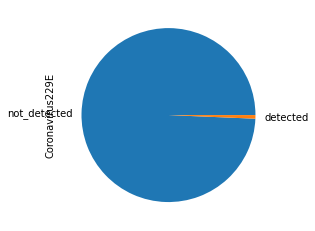

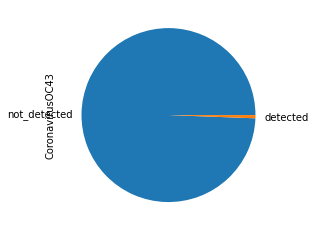

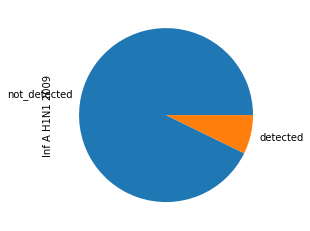

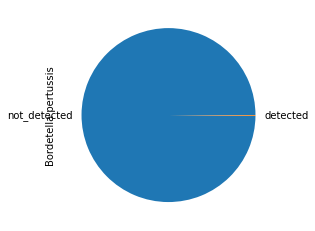

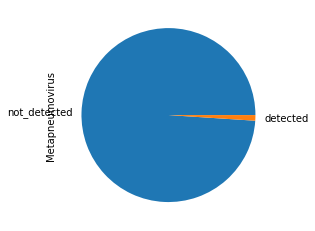

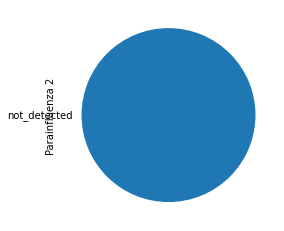

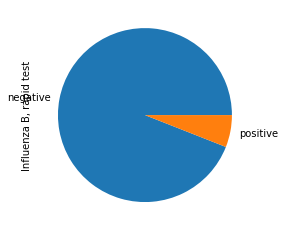

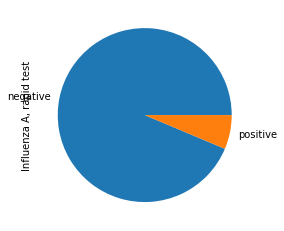

In [21]:
# les variables de type object concernent des cas de test. On va afficher un graphique pour observer
# leur résultat ( not_detected et detected)

for col in Data3.select_dtypes("object"):
    plt.figure()
    Data3[col].value_counts().plot.pie()
    

#### 2.5. Visualisation des relations entre les variables et la variable "target"

### Demarche:
> Création de sous ensemble positif et negatif à travers un boolean indexing en les intégrant à chaque fois dans un dataframe.On sépare les catégories positives de la target dans un dataset et les catégories négatives de la meme variable (target) dans un autre dataset.

> A partir du tableau des valeurs manquantes: Data3.isna().sum()/Data3.shape[0], générer deux datasets ( Test sanguin et test viral) basés sur le filtrage des catégories de valeurs manquantes(viral autour de 76% et Blood 89%). Pour finir, on visualisera la relation entre la target et ces différents sous ensebles.

In [22]:
# Création de sous-ensemble négative
Cas_Negative = Data3[Data3["SARS-Cov-2 exam result"] == "negative"]
#Cas_Negative

In [23]:
# Création de sous-ensemble positive
Cas_Positive = Data3[Data3["SARS-Cov-2 exam result"] == "positive"]
#Cas_Positive

In [24]:
# Création dataset valeurs manquantes
Valeur_Manquante = Data3.isna().sum()/Data3.shape[0]

In [25]:
#Test_Sanguin = Data3.columns[(Valeur_Manquante<0.9) & (Valeur_Manquante>0.8)]
Test_Sanguin = Data3[Data3.columns[(Valeur_Manquante<0.9) & (Valeur_Manquante>0.8)]]

In [26]:
Test_Viral = Data3[Data3.columns[(Valeur_Manquante<0.88) & (Valeur_Manquante>0.75)]]

### Visualiser target/Blood :
> On le fait au moyen d'une bouble for en séparant les cas positifs et les cas négatifs. On va utiliser seaborn (displot()) pour l'affichage. On peut donc voir variable après variable, la différence qu'il y a entre les cas positifs et les cas négatifs.

### Remarque:
> Il se trouve visiblement que les gens positifs au Covid ont un taux de platelets, de leukocytes et de monocytes différents des cas négatifs.

C:\Users\ADOU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADOU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADOU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

C:\Users\ADOU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADOU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: 'negative'

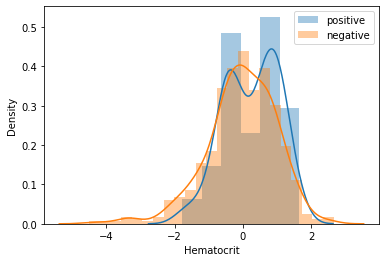

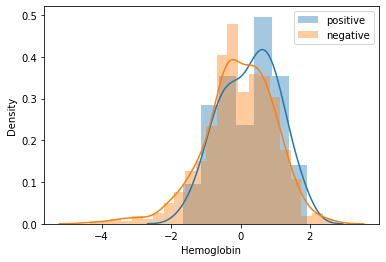

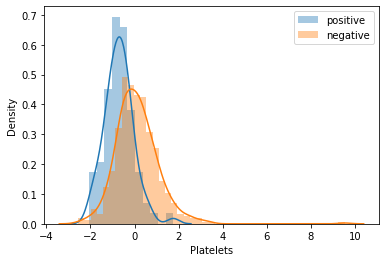

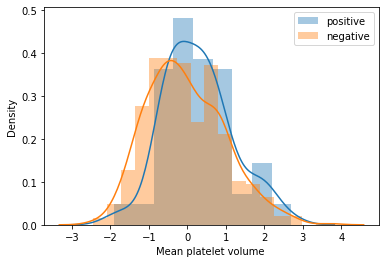

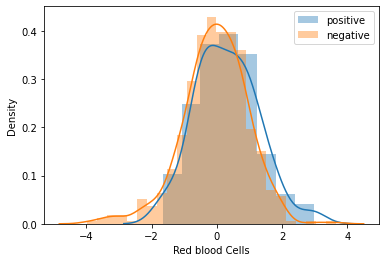

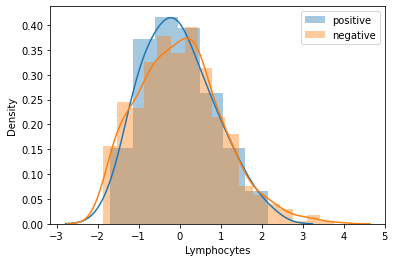

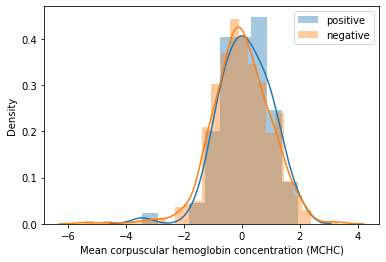

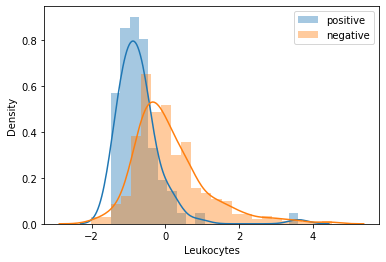

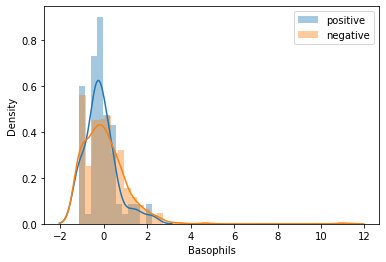

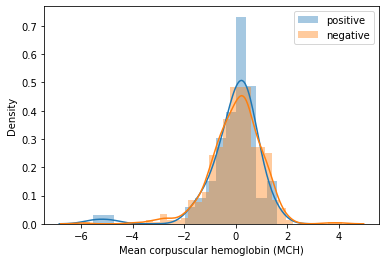

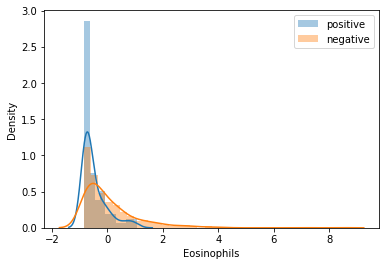

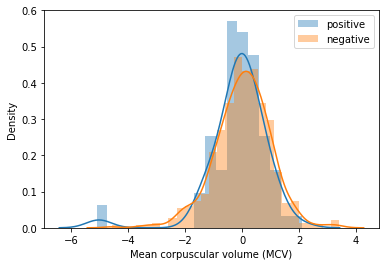

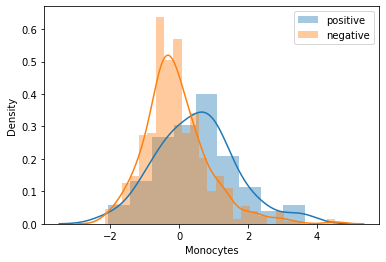

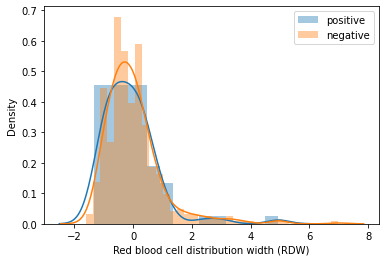

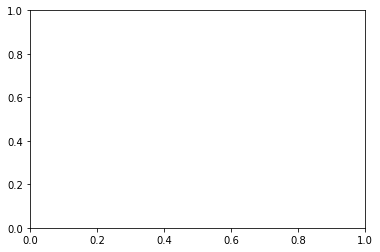

In [27]:
#for col in Test_Sanguin:
    #plt.figure()
    #sns.distplot(Cas_Positive[col].value_counts(), label="positive")
    #sns.distplot(Cas_Negative[col].value_counts(), label="negative")
    #plt.legend()   
    
for col in Test_Sanguin:
    plt.figure()
    sns.distplot(Cas_Positive[col], label="positive")
    sns.distplot(Cas_Negative[col], label="negative")
    plt.legend()   

#### Relation * target/age * avec la fonction countplot() de seaborn
>Avec countplot(), ici on va compter le nombre d'apparition pour chaque "Patient quantile age" pour les résulats positifs et négatifs de de la variable target "SARS-Cov-2 exam result".

> On a peu d'information dans nos données sur la variable "Patient age quantile".
 Pour cela, on ne peut pas ici s'autoriser à dire que l'âge soit lié au risque d'infection.
En revanche, si on parvient à avoir des info sur cette variable, on pourra faire des conclusions
serieuses et crédibles. 

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

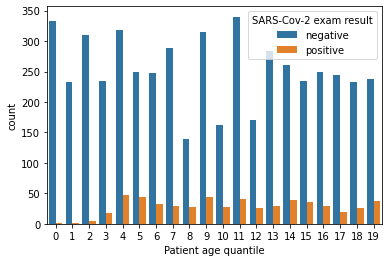

In [28]:
sns.countplot(x="Patient age quantile", hue="SARS-Cov-2 exam result", data=Data3)

### Relation target / Test_Viral : deux variables qualitatives

> Pour la compraraison de ces deux variables qualitatives, on va utiliser la fonction crosstab() de pandas.

> A partir du croisement des deux variables, on constate que 74 personnes détectées à Influenza B sont négatives au Covd_19, 3 personnes détctées à Influenza B sont positives au Covid_19. Ensuite, on remarque que 1168 personnes non détectées à Influenza B ont un test négatif au Covid_19 et 109 non détectées positives au Covid_19. Il est ici rare de voir une personne qui souffre des deux virus (3 cas ici).

> Pour finr, avec la boucle for, on va visuellement montrer cela à travers la fonction heatmap() à nouveau avec cette fois toutes les varaiables. Il arrive rarement que deux personnes aient en meme temps la meme maladie.

In [29]:
pd.crosstab(Data3["SARS-Cov-2 exam result"], Data3["Influenza B"])

Influenza B             detected  not_detected
SARS-Cov-2 exam result                        
negative                      74          1168
positive                       3           109

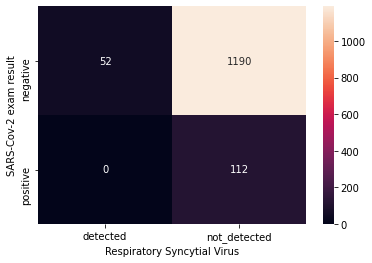

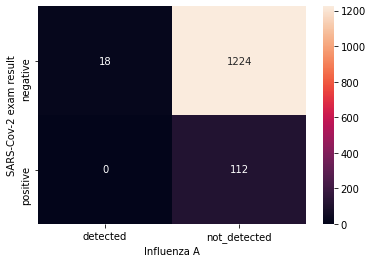

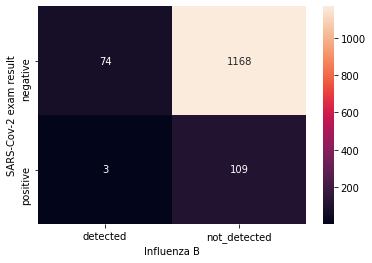

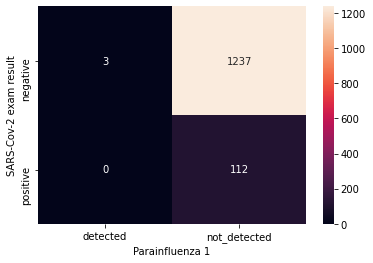

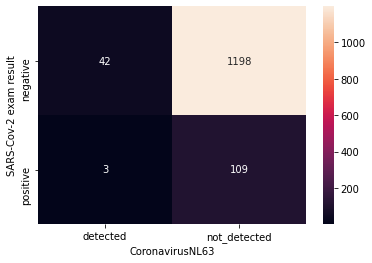

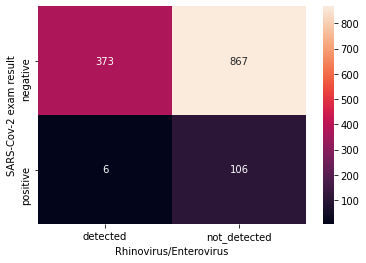

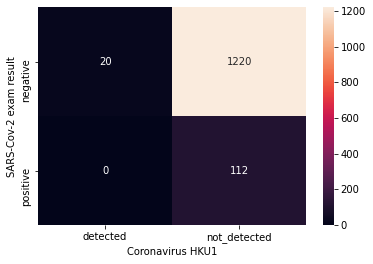

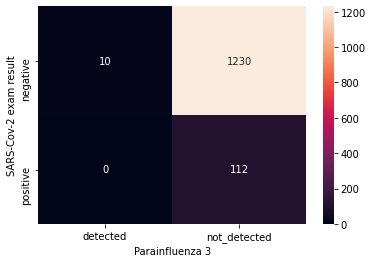

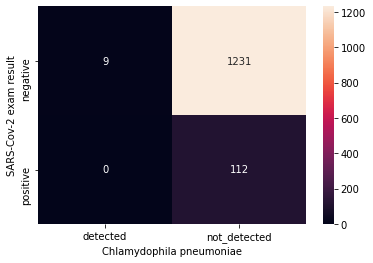

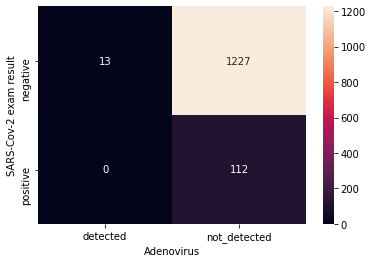

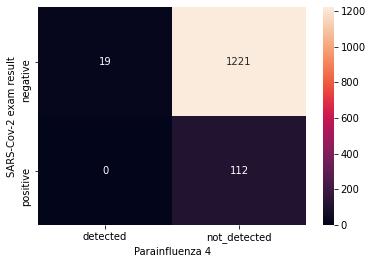

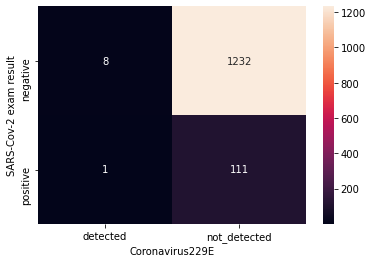

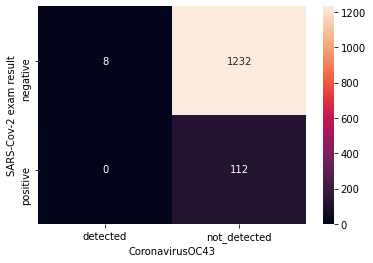

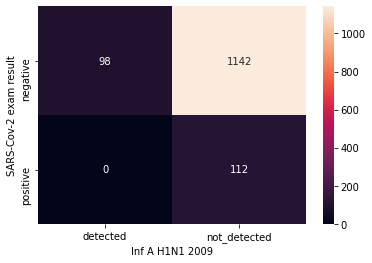

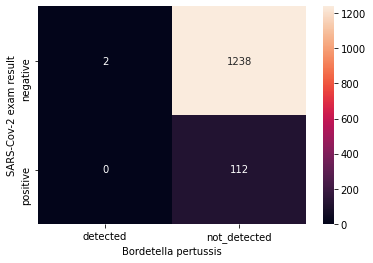

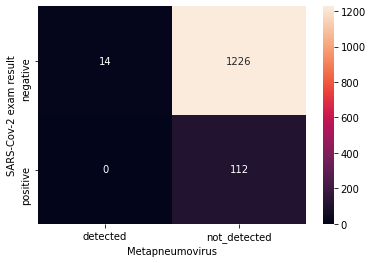

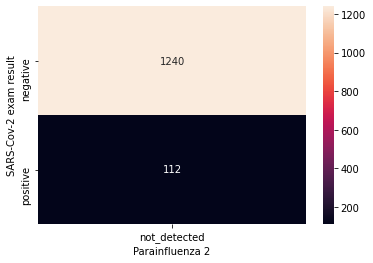

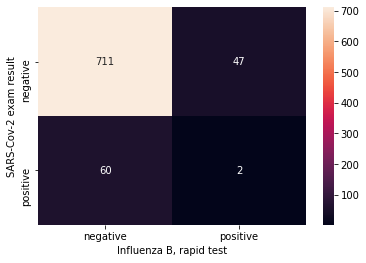

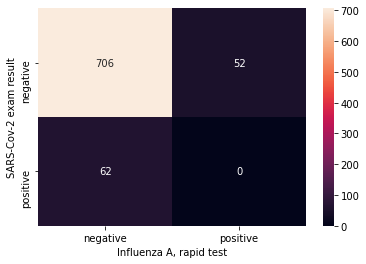

In [31]:
for col in Test_Viral:
    plt.figure()
    sns.heatmap(pd.crosstab(Data3["SARS-Cov-2 exam result"], Data3[col]), annot=True, fmt='d')

# 3. Analyse détaillée :  relations entre les différentes variables

# Demarche:
> On va procéder par catégorie. On va d'abord comparer les variables de taux sanguins. Ensuite la relation entre ces variables et l'age des individus ( le taux de golobule est-il lié à l'age...). 

## Remarque:
> On constate que certaines variables sont très corélées. On a plus 0.9%
de coefficient de corrélation par moment. Ce sont des informations très capitales pour une modélisation par la suite.

> La corrélation entre l'état sanguin et l'age est très faible. De part et d'autre de 1 et de
de -1, la plus forte valeur est 28. On ne peut donc prétendre que l'age ait
un incident sur l'état sanguin.

### 3.1. Relation entre les variables de taux sanguins

<AxesSubplot:>

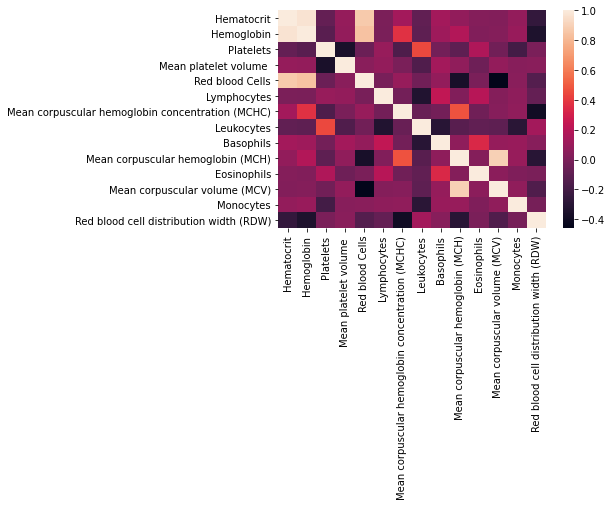

In [32]:
# Un graphique pour avoir une idée des corrélation entre groupe sanguin

sns.heatmap(Test_Sanguin.corr())

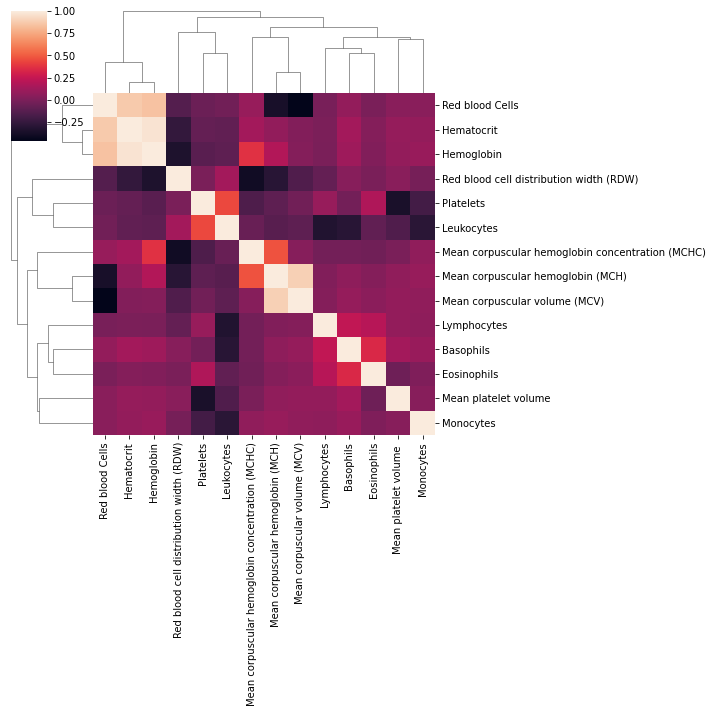

In [33]:
# Ou encore clustermap() pour une corrélation par regroupement.
sns.clustermap(Test_Sanguin.corr())  

In [34]:
# Corrélation entre l'age et les autres variables quantitatives
Data3.corr()["Patient age quantile"].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

In [22]:
# Pour en avoir une idée un peu plus clair, on va établir la corrélation autrement
Data3.corr()["Patient age quantile"].sort_values()

# On voit nettement que la corrélation entre l'age et taux sanguin(Mean corpuscular volume (MCV)) 
#est faible

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

### 3.2.  Relation entre une maladie ( variable catégorie "detected") et l'état sanguin

## Demarche:
> Tableau boolean de tout les cas de test viral ayant la catégorie "detected". On fait la somme du tableau sur l'axe1, l'axe des colonnes, puis on vérifie la condition où cette somme est supérieure ou égal à 1. Pour finir, on crée une nouvelle variable"Diagnostic_Positif" qui enrégistrera les résulats de cette condition.

> On crée deux sous-catégories: Cas1 pour les cas où le diagnostic est seulement positif(True) et Cas2 pour le cas où le résultat est négatif (False)

> On visualise alors le tout dans une boucle for

In [35]:
Test_Viral["Diagnostic_Positif"] = np.sum(Test_Viral== "detected", axis=1)>=0
Test_Viral.head()

<ipython-input-35-8126ac84a615>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_Viral["Diagnostic_Positif"] = np.sum(Test_Viral== "detected", axis=1)>=0


Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0             NaN                    NaN              NaN             NaN   
1    not_detected               detected     not_detected    not_detected   
2             NaN                    NaN              NaN             NaN   
3             NaN                    NaN              NaN             NaN   
4    not_detected               detected     not_detected    not_detected   

  Chlamydophila pneumoniae    Adenovirus Parainfluenza 4 Coronavirus229E  \
0                      NaN           NaN             NaN             NaN   
1             not_detected  not_detected    not_detected    not_detected   
2                      NaN           NaN             NaN             NaN   
3                      NaN           NaN             NaN             NaN   
4             not_detected  not_detected    not_detected    not_detected   

  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
0             NaN             NaN                  NaN             NaN   
1    not_detected    not_detected         not_detected    not_detected   
2             NaN             NaN                  NaN             NaN   
3             NaN             NaN                  NaN             NaN   
4    not_detected    not_detected         not_detected    not_detected   

  Parainfluenza 2 Influenza B, rapid test Influenza A, rapid test  \
0             NaN                     NaN                     NaN   
1    not_detected                negative                negative   
2             NaN                     NaN                     NaN   
3             NaN                     NaN                     NaN   
4    not_detected                     NaN                     NaN   

   Diagnostic_Positif  
0                True  
1                True  
2                True  
3                True  
4                True

In [43]:
Cas1 = Test_Viral[Test_Viral["Diagnostic_Positif"]== True]

In [47]:
Cas2 = Test_Viral[Test_Viral["Diagnostic_Positif"]== False]

In [51]:
#for col in Test_Sanguin:
    #plt.figure()
    #sns.distplot(Cas1[col], label="positive")
    #sns.distplot(Cas2[col], label="negative")
    #plt.legend()
    
# En commentaire parce qu'il n'affiche pas : KeyError: 'Hematocrit'. 
# may be you can give you can give topinion

* Sources :
    
    https://matplotlib.org/
    
    https://pandas.pydata.org/docs/
    
    https://seaborn.pydata.org/ 
    
    https://www.youtube.com/watch?v=82KLS2C_gNQ&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq 